# Import libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier       # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [4]:
df = pd.read_csv('recipient_totals.csv')

In [5]:
df.head()

,period,programme,scheme,scheme_description,basis,recipients
0,2014Q1,Children,BSCFA,Back To School Clothing And Footwear,Social Assistance,137
1,2014Q1,Children,CB,Child Benefit,Social Assistance,623739
2,2014Q1,Children,FIS,Family Income Supplement,Social Assistance,48327
3,2014Q1,Children,ORC,Guardians Payment (Contributory),Social Insurance,487
4,2014Q1,Children,ORNC,Guardians Payment (Non-Contributory),Social Assistance,221


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   period              1647 non-null   object
 1   programme           1647 non-null   object
 2   scheme              1647 non-null   object
 3   scheme_description  1647 non-null   object
 4   basis               1647 non-null   object
 5   recipients          1647 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 77.3+ KB


In [7]:
df.shape

(1647, 6)

In [8]:
new_df = df[df['programme'].str.contains('Working Age Employment Supports', case=True)] #drop some row

In [9]:
new_df.head()

,period,programme,scheme,scheme_description,basis,recipients
24,2014Q1,Working Age Employment Supports,BTW,Back To Work Scheme,Social Assistance,11888
25,2014Q1,Working Age Employment Supports,PCB,Partial Capacity Benefit,Social Insurance,1411
26,2014Q1,Working Age Employment Supports,STEA,Short Term Enterprise,Social Assistance,50
66,2014Q2,Working Age Employment Supports,BTW,Back To Work Scheme,Social Assistance,12177
67,2014Q2,Working Age Employment Supports,PCB,Partial Capacity Benefit,Social Insurance,1526


In [10]:
new_df.isnull().sum()

period                0
programme             0
scheme                0
scheme_description    0
basis                 0
recipients            0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
new_df.period = le.fit_transform(new_df.period)  #trocar letrar por números
new_df.programme = le.fit_transform(new_df.programme)
new_df.scheme = le.fit_transform(new_df.scheme)
new_df.scheme_description = le.fit_transform(new_df.scheme_description) 
new_df.basis = le.fit_transform(new_df.basis) 
new_df.recipients = le.fit_transform(new_df.recipients)

In [12]:
new_df.head()

,period,programme,scheme,scheme_description,basis,recipients
24,0,0,0,0,0,103
25,0,0,1,2,1,43
26,0,0,3,3,0,23
66,1,0,0,0,0,104
67,1,0,1,2,1,45


# Model Building and Evaluation
    Start building a decision tree

In [13]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [42]:
# Putting feature variable to X
X = new_df.drop('scheme',axis=1)

# Putting response variable to y
y = new_df['scheme']

In [43]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,period,programme,scheme_description,basis,recipients
1397,31,0,2,1,90
1207,27,0,3,0,2
1584,35,0,0,0,69
408,9,0,2,1,54
109,2,0,2,1,47


In [44]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [45]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         2

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [46]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[11  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  2]]
1.0


[Text(0.4010416666666667, 0.9166666666666666, 'x[2] <= 1.5\ngini = 0.987\nsamples = 93\nvalue = [1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1\n1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(0.13541666666666666, 0.75, 'x[2] <= 0.5\ngini = 0.979\nsamples = 49\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1\n1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1]'),
 Text(0.041666666666666664, 0.5833333333333334, 'x[0] <= 0.5\ngini = 0.962\nsamples = 26\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 

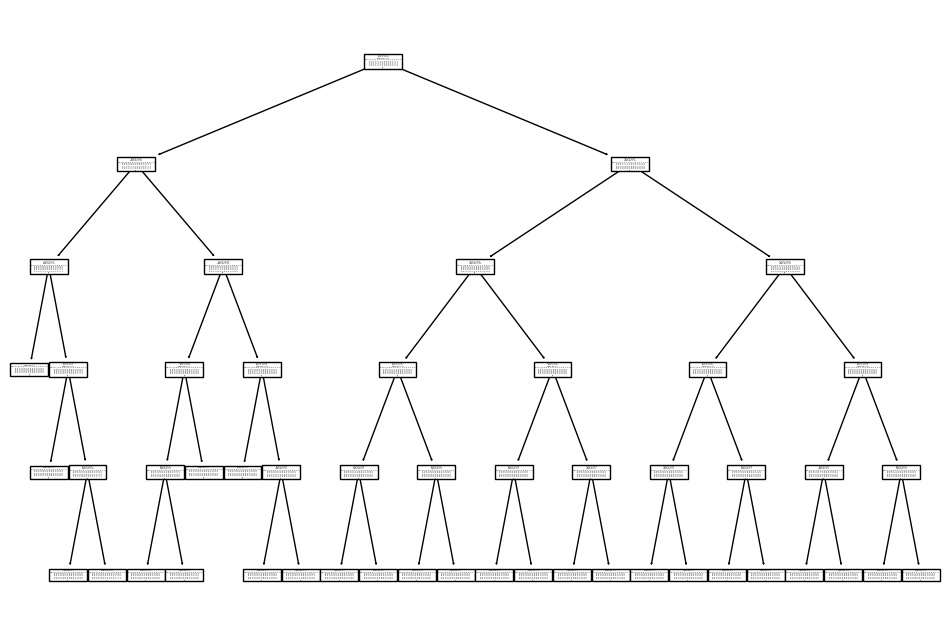

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

# Grid Search CV


In [47]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 5)},
             verbose=1)

In [93]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005190,0.009396,0.000000,0.000000,entropy,0,"{'criterion': 'entropy', 'max_depth': 0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.006294,0.008835,0.002294,0.002136,entropy,1,"{'criterion': 'entropy', 'max_depth': 1}",0.578947,0.526316,0.526316,0.611111,0.611111,0.570760,0.038142,7
2,0.002592,0.000799,0.001500,0.000447,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.947368,0.947368,0.894737,0.944444,0.944444,0.935673,0.020510,4
3,0.001594,0.000489,0.001596,0.000488,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",1.000000,1.000000,0.947368,1.000000,1.000000,0.989474,0.021053,1
4,0.002297,0.000401,0.001697,0.000744,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",1.000000,1.000000,0.947368,1.000000,1.000000,0.989474,0.021053,1
5,0.000797,0.000398,0.000000,0.000000,gini,0,"{'criterion': 'gini', 'max_depth': 0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
6,0.001899,0.000493,0.001099,0.000485,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.578947,0.526316,0.526316,0.611111,0.611111,0.570760,0.038142,7
7,0.001900,0.000659,0.001395,0.000489,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.842105,0.789474,0.789474,0.833333,0.833333,0.817544,0.023142,6
8,0.002300,0.000402,0.001396,0.000489,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.947368,0.947368,0.894737,0.944444,0.944444,0.935673,0.020510,4
9,0.001699,0.000746,0.001102,0.000483,gini,4,"{'criterion': 'gini', 'max_depth': 4}",1.000000,1.000000,0.947368,1.000000,1.000000,0.989474,0.021053,1


In [73]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9894736842105264
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [74]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.9894736842105264

### Running the model with best parameters obtained from grid search

In [75]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=100)

In [76]:
# accuracy score
clf_gini.score(X_test,y_test)

1.0

[Text(0.5, 0.9, 'x[2] <= 0.5\ngini = 0.757\nsamples = 93\nvalue = [26, 23, 5, 27, 12]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 26\nvalue = [26, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 0.5\ngini = 0.682\nsamples = 67\nvalue = [0, 23, 5, 27, 12]'),
 Text(0.5, 0.5, 'x[2] <= 3.5\ngini = 0.536\nsamples = 44\nvalue = [0, 0, 5, 27, 12]'),
 Text(0.3333333333333333, 0.3, 'x[2] <= 2.0\ngini = 0.264\nsamples = 32\nvalue = [0, 0, 5, 27, 0]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]')]

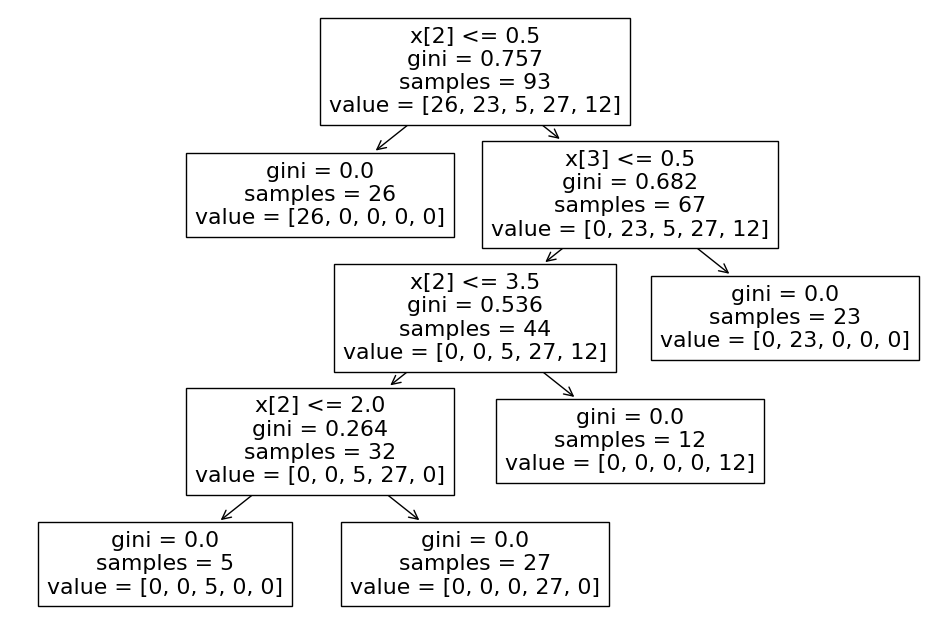

In [77]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini)

In [85]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=6,
                                  min_samples_split=6)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.925


[Text(0.4, 0.875, 'x[2] <= 0.5\ngini = 0.757\nsamples = 93\nvalue = [26, 23, 5, 27, 12]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 26\nvalue = [26, 0, 0, 0, 0]'),
 Text(0.6, 0.625, 'x[3] <= 0.5\ngini = 0.682\nsamples = 67\nvalue = [0, 23, 5, 27, 12]'),
 Text(0.4, 0.375, 'x[2] <= 3.5\ngini = 0.536\nsamples = 44\nvalue = [0, 0, 5, 27, 12]'),
 Text(0.2, 0.125, 'gini = 0.264\nsamples = 32\nvalue = [0, 0, 5, 27, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 0, 12]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23, 0, 0, 0]')]

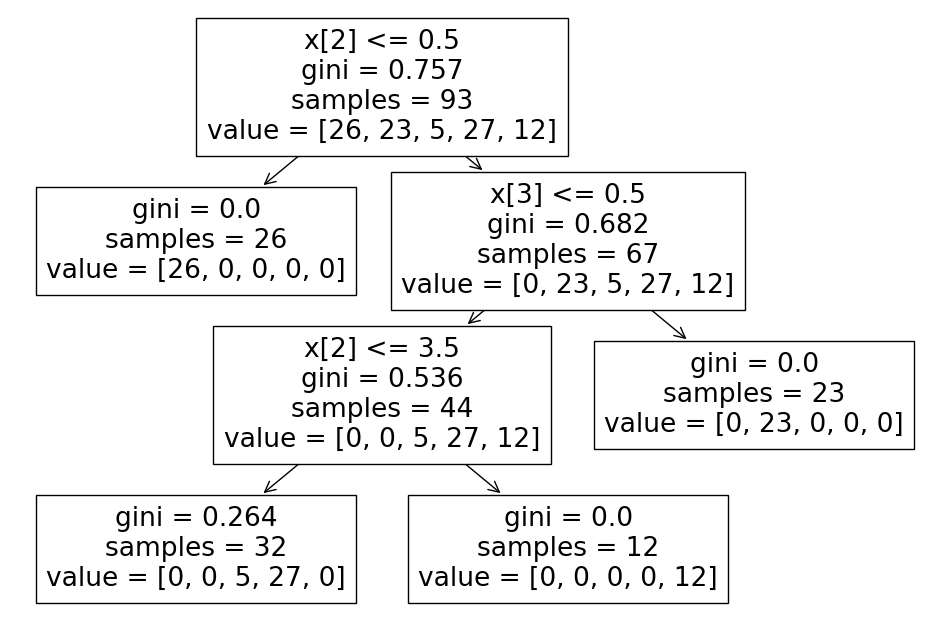

In [86]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

In [87]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       0.00      0.00      0.00         3
           3       0.77      1.00      0.87        10
           4       1.00      1.00      1.00         2

    accuracy                           0.93        40
   macro avg       0.75      0.80      0.77        40
weighted avg       0.87      0.93      0.89        40



In [88]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[11  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  2]]
